In [9]:
%load_ext sql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pandas as pd 
import configparser
from psycopg2 import connect
import psycopg2.sql as pg
import pandas.io.sql as pandasql
import numpy as np 
CONFIG = configparser.ConfigParser()
CONFIG.read(r'C:\\Users\\alouis2\\Documents\\Python Scripts\\db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)


x = open('C:\\Users\\alouis2\\Documents\\Python Scripts\\andrew.txt', 'r')
x = x.readlines()[0]
%sql $x

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: alouis2@bigdata'

Total distinct `link_dir` in Oct:

In [3]:
%sql select count(*) from (select distinct(link_dir) from here.ta_201710) oct

1 rows affected.


count
146728


Total distinct `link_dir` in Nov:

In [4]:
%sql select count(*) from (select distinct(link_dir) from here.ta_201711) nov

1 rows affected.


count
144502


Common `link_dir` for Nov and Oct (i.e. $Nov \cap Oct$):

In [5]:
%%sql

select count(*) as intersection from (select distinct(link_dir) as links from here.ta_201711
INTERSECT 
select distinct(link_dir) as links from here.ta_201710) as common

1 rows affected.


intersection
139168


`link_dir` in Oct AND NOT in Nov (i.e. $Oct - (Nov \cap Oct)$):

In [6]:
146728-139168

7560

Below are frequency histograms for the links' counts for each month. The shaded data represents the respective month in the title of the graph, and the black line represents the month it is being compared to. 

In [7]:
string1 = '''SELECT count(link_dir) as count_oct FROM here.ta_201710
            WHERE link_dir NOT IN (select distinct(link_dir) FROM here.ta_201711
            INTERSECT 
            SELECT distinct(link_dir) FROM here.ta_201710)
            GROUP BY link_dir'''

string2 = '''SELECT count(link_dir) as count_nov FROM here.ta_201711
            WHERE link_dir NOT IN (select distinct(link_dir) FROM here.ta_201711
            INTERSECT 
            SELECT distinct(link_dir) FROM here.ta_201710)
            GROUP BY link_dir'''

october = pandasql.read_sql(pg.SQL(string1), con)

november = pandasql.read_sql(pg.SQL(string2), con)

In [17]:
o = np.array(np.log(october['count_oct']))
n = np.array(np.log(november['count_nov']))
o.min(), o.max(), n.min(), n.max()

(0.0, 8.8855792912829816, 0.0, 8.8265878307736685)

C:\Users\alouis2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


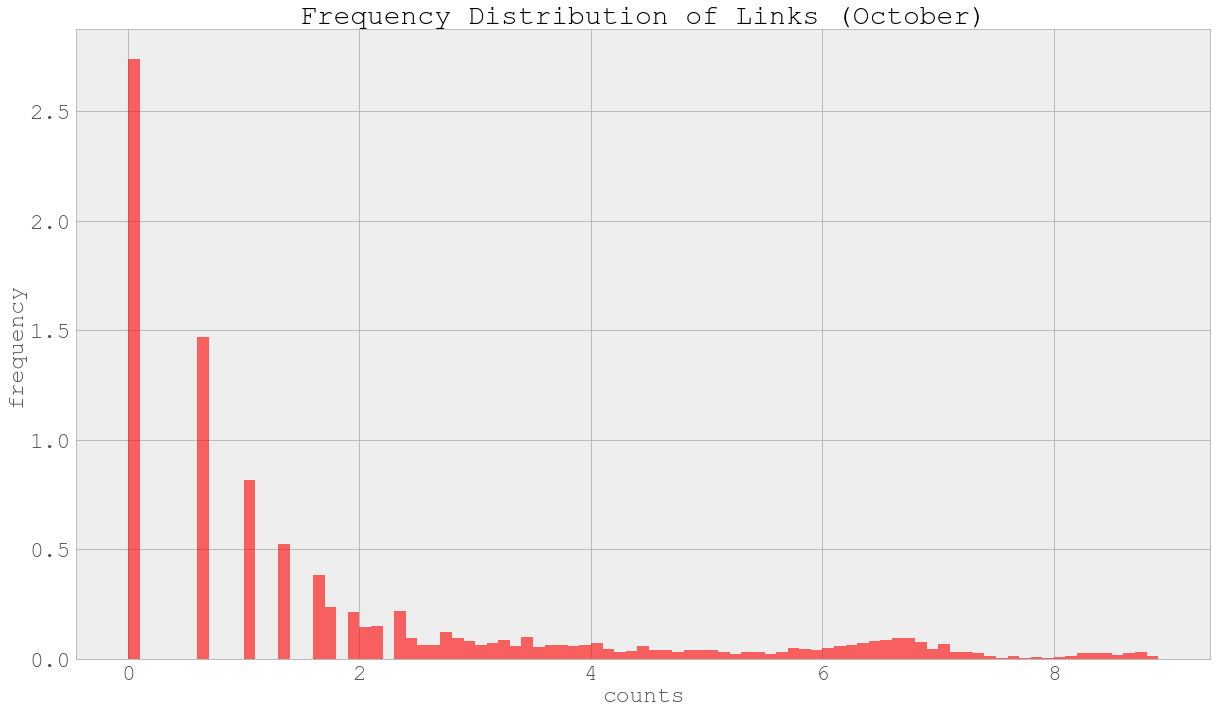

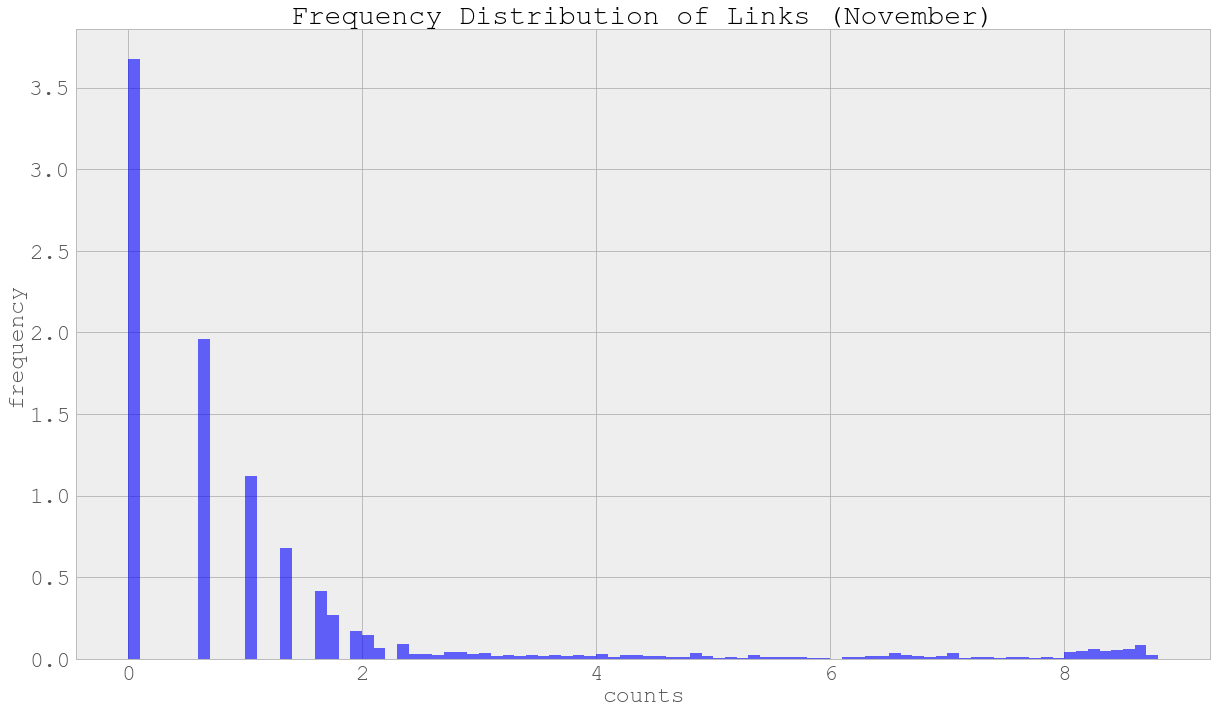

In [19]:
pd.options.display.mpl_style = 'default'
s = 23
plt.figure(figsize = (17,10))

plt.hist(o, normed=True, bins = [0.1*i for i in range(0, 90)], alpha=0.6, color = 'red')

plt.xlabel('counts', fontsize = s)
plt.ylabel('frequency', fontsize = s)
plt.rc('ytick', labelsize=s)
plt.rc('xtick', labelsize=s)
plt.title('Frequency Distribution of Links (October)', fontsize = 28)
plt.tight_layout()

pd.options.display.mpl_style = 'default'
plt.figure(figsize = (17,10))
plt.hist(n, normed=True, bins = [0.1*i for i in range(0, 89)], alpha=0.6, color = 'blue')

plt.xlabel('counts', fontsize = s)
plt.ylabel('frequency', fontsize = s)
plt.rc('ytick', labelsize=s)
plt.rc('xtick', labelsize=s)
plt.title('Frequency Distribution of Links (November)', fontsize = 28)
plt.tight_layout()

plt.show()

`link_dir` in Nov AND NOT in Oct (i.e. $Nov - (Nov \cap Oct)$):

In [24]:
144502-139168

5334

In [5]:
%%sql

select intersection/total as percentage from 

(select count(*)::float as intersection from (select distinct(link_dir) as links from here.ta_201711
INTERSECT 
select distinct(link_dir) as links from here.ta_201710) as common) t1, 
(select count(*)::float as total from (select distinct(link_dir) from here.ta_201710) f) t2; 

1 rows affected.


percentage
0.94847609181615


In [6]:
%%sql 
select intersection/total as percentage from 

(select count(*)::float as intersection from (select distinct(link_dir) as links from here.ta_201711
INTERSECT 
select distinct(link_dir) as links from here.ta_201710) as common) t1, 
(select count(*)::float as total from (select distinct(link_dir) from here.ta_201711) f) t2;

1 rows affected.


percentage
0.963087016096663


Therefore, we find the percentage of links whose counts stayed the same. 